VISIBILITY DISTANCE PREDICTION

PROBLEM STATEMENT:
Air Traffic Control (ATC) requires accurate tracking of weather conditions to predict visibility distance, which is a critical parameter for safe flight operations. Since the ability to fly planes heavily depends on sufficient visibility, developing a reliable prediction model for visibility distance is essential to ensure safety and efficiency in aviation.

DATA COLLECTION:
The dataset was collected from public meteorological repositories, government open-data platforms, aviation weather stations, and Kaggle weather datasets, which provide hourly weather parameters like temperature, humidity, visibility, wind speed, and pressure. The raw data was merged, cleaned, and standardized while retaining missing values and outliers to reflect real-world conditions.

FEATURE INFORMATION:
DATE
VISIBILITY - Distance from which can object can be seen.
DRYBULBTEMPF - Dry bulb temperature (degrees Farenheit). Most commonly reported standard temperature.
WETBULBTEMPF - Wet bulb temperature (degrees Farenheit)
DewPointTempF - Dew point temperature (degrees Farenheit)
Relative Humidity - Relative humidity (percent)
WindSpeed - Wind speed (miles per hour)
Wind Direction - Wind direction from true north using compass directions.
StationPressure - - Atmospheric pressure (inches of Mercury, or "in Hg").
SeaLevelPressure - Sea level pressure (in Hg).
Precip - Total precipitation in the past hour (in inches)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

df=pd.read_csv(r'Visibility_weather_data.csv')

In [3]:
df.head(5)

,DATE,VISIBILITY,DRYBULBTEMPF,WETBULBTEMPF,DewPointTempF,RelativeHumidity,WindSpeed,WindDirection,StationPressure,SeaLevelPressure,Precip
0,01-01-2010 00:00,9.993428,80.0,68.0,NaN,7.0,4.626061,253.0,30.02,30.41,0.11
1,01-01-2010 01:00,8.723471,30.0,69.0,78.0,77.0,0.913084,179.0,29.48,30.03,0.13
2,01-01-2010 02:00,10.295377,NaN,2.0,41.0,43.0,10.303187,7.0,29.87,30.24,0.08
3,01-01-2010 03:00,12.046060,NaN,48.0,44.0,70.0,17.072654,188.0,29.99,30.05,0.07
4,01-01-2010 04:00,8.531693,37.0,NaN,-18.0,77.0,9.176510,34.0,29.57,30.13,0.15


In [4]:
df.describe()

,VISIBILITY,DRYBULBTEMPF,WETBULBTEMPF,DewPointTempF,RelativeHumidity,WindSpeed,WindDirection,StationPressure,SeaLevelPressure,Precip
count,9800.000000,9800.000000,9800.000000,9800.000000,9800.000000,9800.000000,9800.000000,9800.000000,9800.000000,9800.000000
mean,8.988900,52.540102,44.503061,32.098163,51.740510,10.515150,178.904490,29.897365,29.997285,0.089835
std,1.993760,30.834047,26.119811,30.201077,27.910659,8.552105,104.445345,0.198420,0.199591,0.067523
min,1.155199,0.000000,0.000000,-20.000000,5.000000,0.000579,0.000000,29.170000,29.250000,0.000000
25%,7.654819,26.000000,22.000000,6.000000,28.000000,6.559318,88.000000,29.760000,29.860000,0.040000
50%,8.989333,53.000000,44.000000,32.000000,51.500000,9.967941,179.000000,29.900000,30.000000,0.080000
75%,10.339534,79.000000,67.000000,58.000000,76.000000,13.434202,268.000000,30.030000,30.130000,0.130000
max,14.000000,195.000000,89.000000,84.000000,100.000000,214.417026,360.000000,30.630000,30.740000,0.430000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DATE              10000 non-null  object 
 1   VISIBILITY        9800 non-null   float64
 2   DRYBULBTEMPF      9800 non-null   float64
 3   WETBULBTEMPF      9800 non-null   float64
 4   DewPointTempF     9800 non-null   float64
 5   RelativeHumidity  9800 non-null   float64
 6   WindSpeed         9800 non-null   float64
 7   WindDirection     9800 non-null   float64
 8   StationPressure   9800 non-null   float64
 9   SeaLevelPressure  9800 non-null   float64
 10  Precip            9800 non-null   float64
dtypes: float64(10), object(1)
memory usage: 859.5+ KB


In [6]:
df.shape

(10000, 11)

In [7]:
df['DATE']=pd.to_datetime(df['DATE'], format='%d-%m-%Y %H:%M')

In [8]:
df.isnull().sum()

DATE                  0
VISIBILITY          200
DRYBULBTEMPF        200
WETBULBTEMPF        200
DewPointTempF       200
RelativeHumidity    200
WindSpeed           200
WindDirection       200
StationPressure     200
SeaLevelPressure    200
Precip              200
dtype: int64

In [9]:
#To check if the same rows are missing across all columns
df[df.isnull().any(axis=1)].head()

,DATE,VISIBILITY,DRYBULBTEMPF,WETBULBTEMPF,DewPointTempF,RelativeHumidity,WindSpeed,WindDirection,StationPressure,SeaLevelPressure,Precip
0,2010-01-01 00:00:00,9.993428,80.0,68.0,NaN,7.0,4.626061,253.0,30.02,30.41,0.11
2,2010-01-01 02:00:00,10.295377,NaN,2.0,41.0,43.0,10.303187,7.0,29.87,30.24,0.08
3,2010-01-01 03:00:00,12.046060,NaN,48.0,44.0,70.0,17.072654,188.0,29.99,30.05,0.07
4,2010-01-01 04:00:00,8.531693,37.0,NaN,-18.0,77.0,9.176510,34.0,29.57,30.13,0.15
13,2010-01-01 13:00:00,5.173440,20.0,43.0,75.0,20.0,NaN,146.0,29.92,NaN,NaN


In [10]:
df.fillna(df.median(), inplace=True)

In [11]:
df.isnull().sum()

DATE                0
VISIBILITY          0
DRYBULBTEMPF        0
WETBULBTEMPF        0
DewPointTempF       0
RelativeHumidity    0
WindSpeed           0
WindDirection       0
StationPressure     0
SeaLevelPressure    0
Precip              0
dtype: int64

In [12]:
#Define numerical and categorical columns
columns= [column for column in df.columns if column != "VISIBILITY"] #Visibility is our target column

numerical_features=[feature for feature in columns if df[feature].dtype != 'O']
categorical_features=[feature for feature in columns if df[feature].dtype == 'O']

print('We have {} numerical features : {}'.format(len(numerical_features), numerical_features))
print('We have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 10 numerical features : ['DATE', 'DRYBULBTEMPF', 'WETBULBTEMPF', 'DewPointTempF', 'RelativeHumidity', 'WindSpeed', 'WindDirection', 'StationPressure', 'SeaLevelPressure', 'Precip']
We have 0 categorical features : []


In [13]:
df.columns

Index(['DATE', 'VISIBILITY', 'DRYBULBTEMPF', 'WETBULBTEMPF', 'DewPointTempF',
       'RelativeHumidity', 'WindSpeed', 'WindDirection', 'StationPressure',
       'SeaLevelPressure', 'Precip'],
      dtype='object')

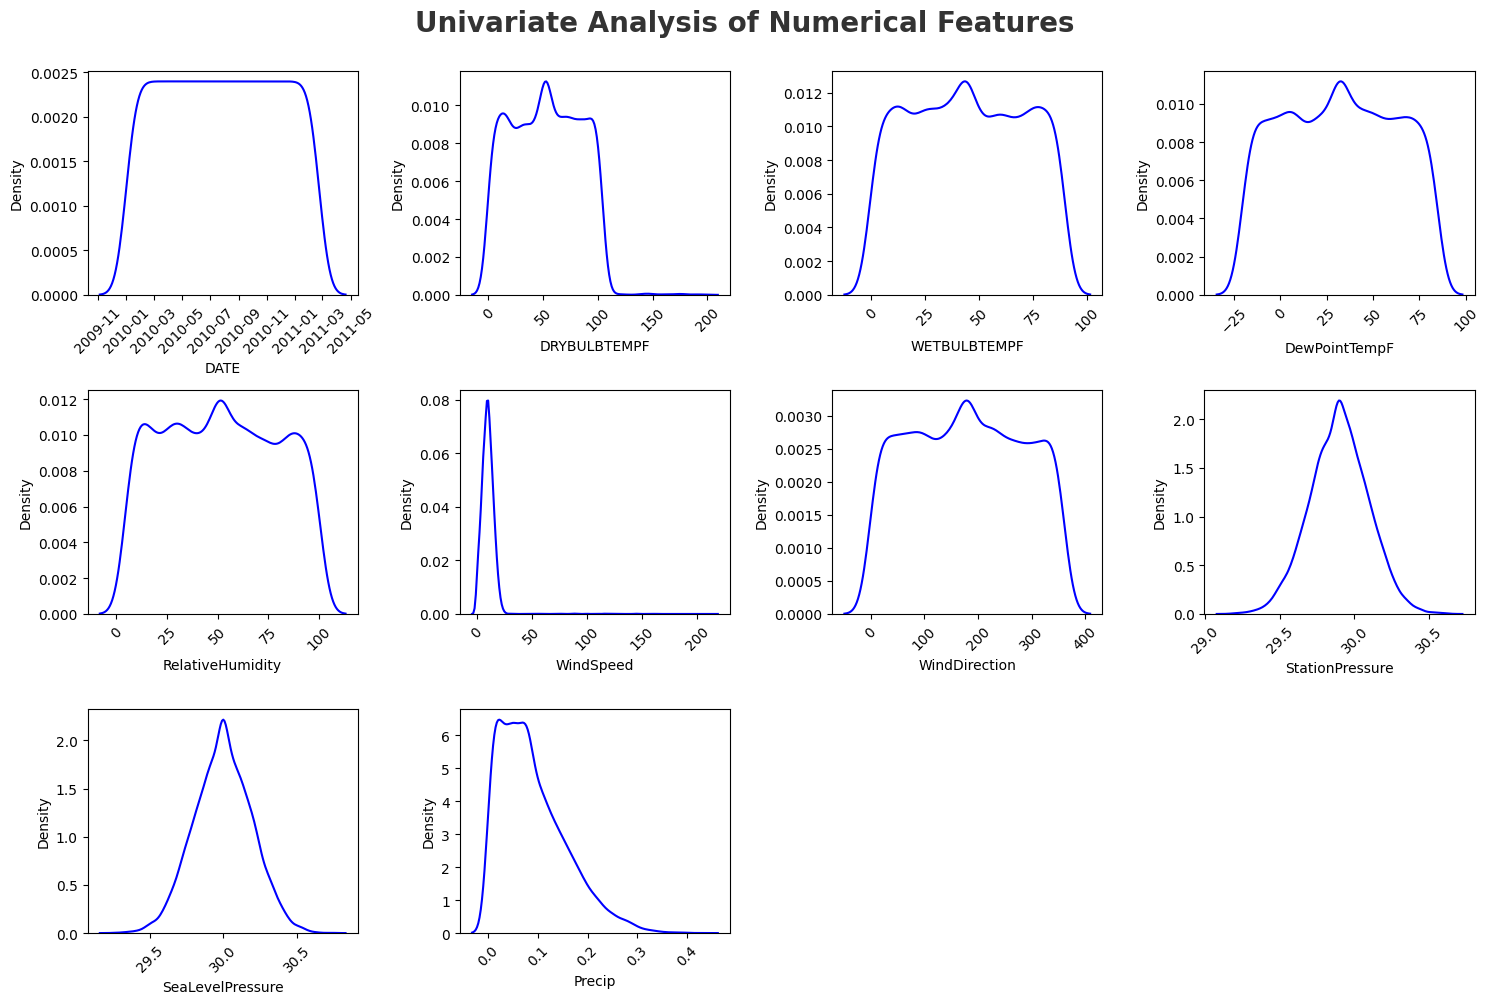

In [14]:
plt.figure(figsize=(15,10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numerical_features)):
    plt.subplot(3,4,i+1)
    sns.kdeplot(df[numerical_features[i]], color='blue')
    plt.xlabel(numerical_features[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

REPORT ON UNIVARIATE ANALYSIS

1. DATE – Most of the values falls in 2009–2011 range and has outliers.
2. DRYBULBTEMPF – Most values fall in the range of 0–100°F, with some outliers extending beyond 100. The distribution is nearly uniform with slight peaks.
3. WETBULBTEMPF – Values are concentrated between 0–80°F, with a flat distribution and mild peaks. Outliers exist above 80.
4. DewPointTempF – Distribution is similar to WetBulbTemp, spread across 0–80°F with outliers.
5. RelativeHumidity – Values are spread across 0–100%, fairly uniform.
6. WindSpeed – Right-skewed distribution. Most values fall between 0–35, with a long tail extending beyond 150 (rare outliers).
7. WindDirection – Values are uniformly spread across 0–360°, as expected.
8. StationPressure – Follows a normal distribution centered near 30 inHg, with small deviations and some outliers.
9. SeaLevelPressure – Also normally distributed around 30 inHg, symmetric and bell-shaped, with few outliers.
10. Precip – Strongly right-skewed. Most values are near 0, with only a few higher precipitation values.

C:\Users\riya choudhary\AppData\Local\Temp\ipykernel_19636\3796481238.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
C:\Users\riya choudhary\AppData\Local\Temp\ipykernel_19636\3796481238.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
C:\Users\riya choudhary\AppD

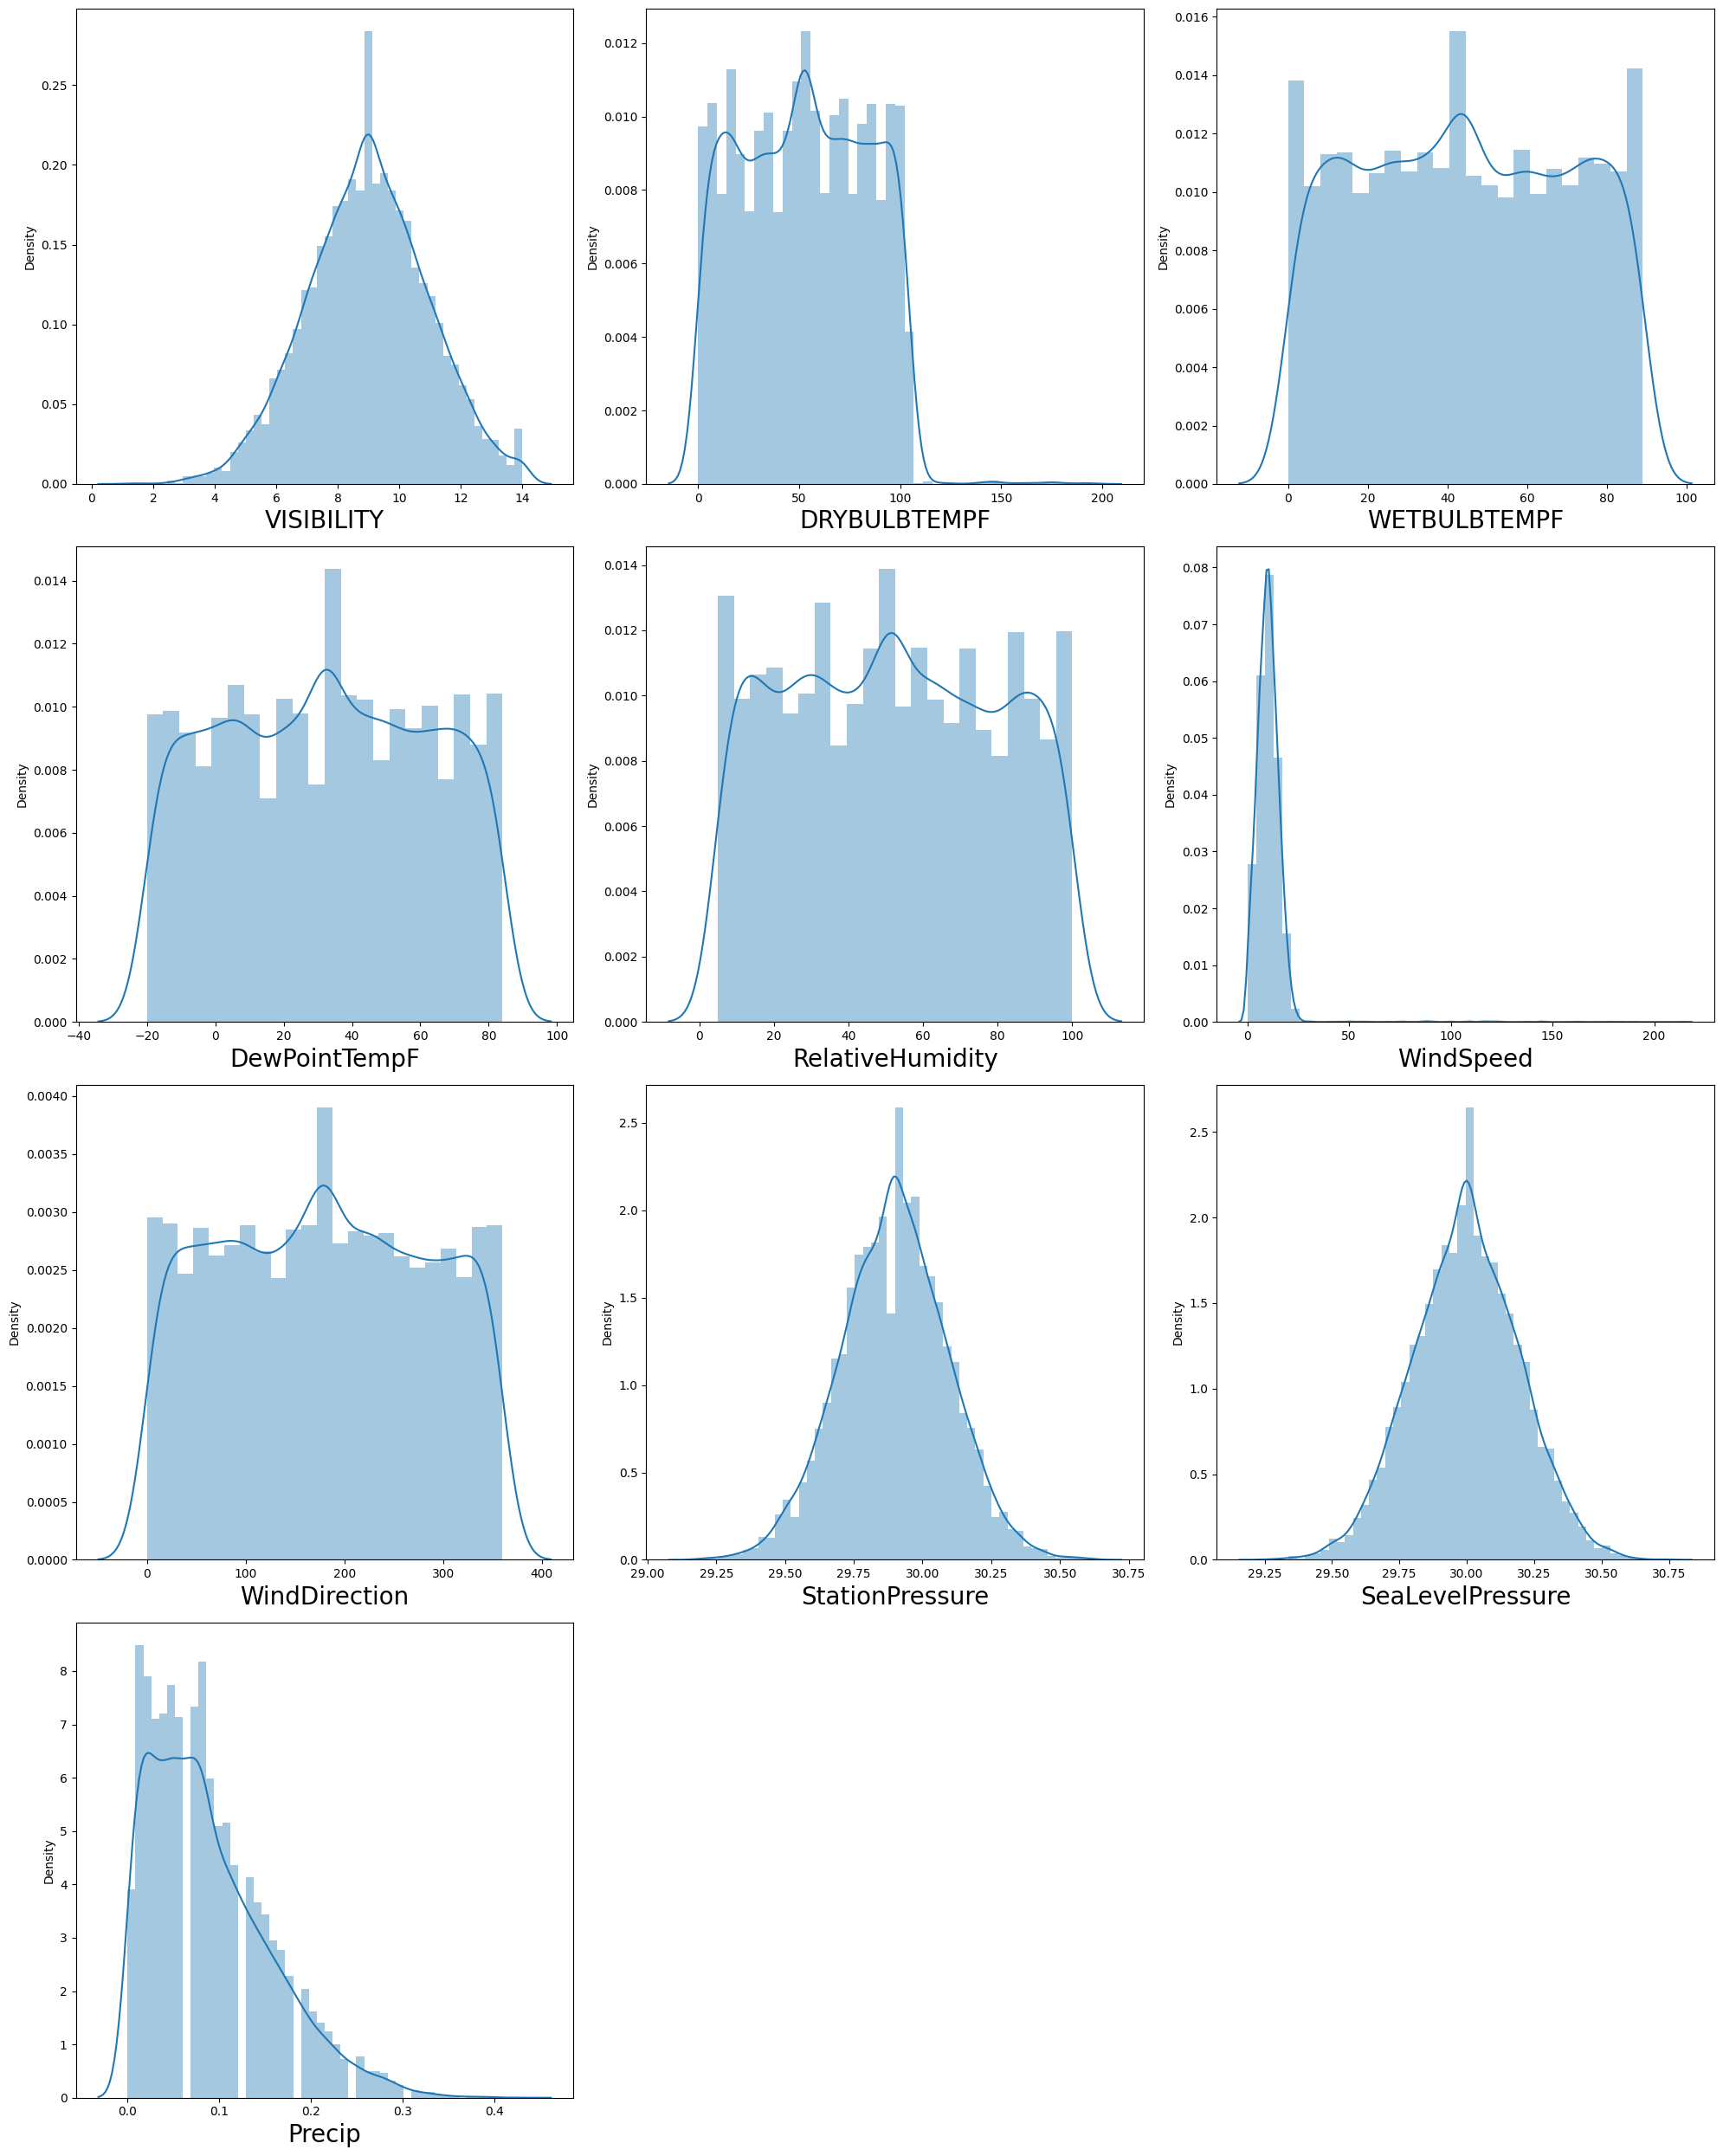

In [15]:
#MULTIVARIATE ANALYSIS
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df.drop(['DATE'], axis=1):
    ax=plt.subplot(4,3,plotnumber)
    sns.distplot(df[column])
    plt.xlabel(column, fontsize=20)
    plotnumber += 1
plt.tight_layout()

In [16]:
#Precip can be dropped because it’s highly skewed with most values near zero, offering little useful variation for prediction.
df= df.drop(columns='Precip')
#From the graph it is clearly visible that some columns are highly correlated with each other
df=df.drop(['WETBULBTEMPF','DewPointTempF','StationPressure'],axis=1)

<Axes: >

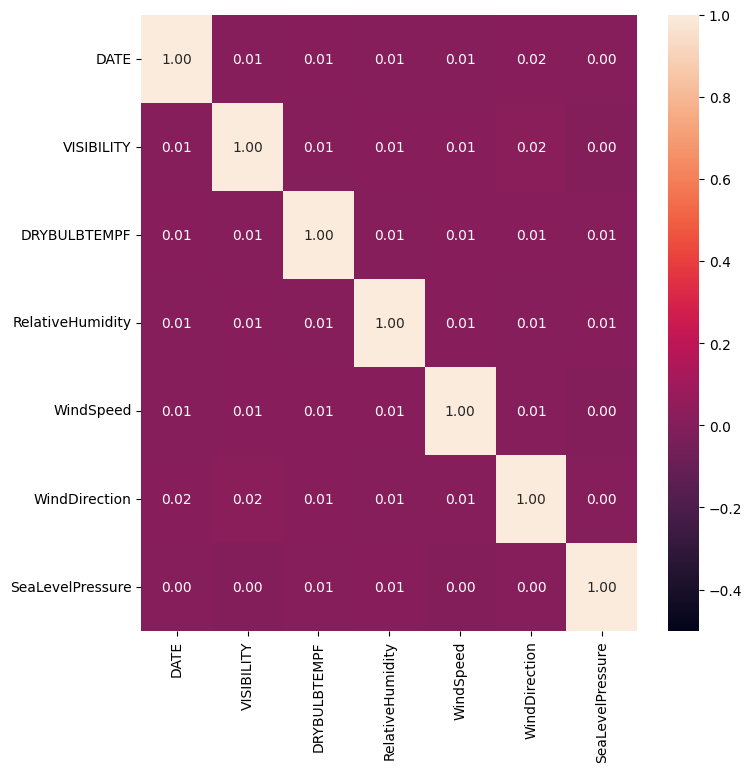

In [17]:
#CORRELATION
plt.figure(figsize=(8,8))
plt_data=df
sns.heatmap(plt_data.corr().abs(),vmin=-0.5, vmax=1, annot=True, fmt=".2f")

MULTICOLLINEARITY CHECK:
It occurs when there are teo or more independent variables in a multiple regression model, which have a high correlation among themselves.

Variance Inflation Factor (VIF):
It measures the severity of multicollinearity in a regression model.


In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def compute_vif(considered_features,df):
    x=df[considered_features]
    #Calculation of vif requires a constant
    x['Intercept']=1
    #Create dataframe to store vif values
    vif=pd.DataFrame()
    vif['Variable']=x.columns
    vif['VIF']=[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    vif=vif[vif['Variable']!='Intercept']
    return vif

#We will remove the 'DATE' column for VIF calculation
features=df.columns.tolist()
features.remove('DATE')
vif=compute_vif(features,df)
vif

,Variable,VIF
0,VISIBILITY,1.000731
1,DRYBULBTEMPF,1.000511
2,RelativeHumidity,1.000542
3,WindSpeed,1.000565
4,WindDirection,1.000764
5,SeaLevelPressure,1.000213


ANALYSIS REPORT

1.There are no missing values in the dataset.
2.WindSpeed is highly skewed, with most values close to zero, so it adds little information.
3.WetBulbTempF, DewPointTempF, and StationPressure are strongly correlated with other variables, so we removed them to reduce redundancy.
4.VIF analysis shows no severe multicollinearity among the final selected features, so they can be safely used in modeling.
5.Final selected features are:
    DATE
    WindDirection
    Visibility
    DryBulbTempF
    RelativeHumidity
    SeaLevelPressure
    Precip